In [20]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm
import statsmodels.api as sm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')


In [12]:
# cargamos el conjunto de datos con el que llevamos trabajando las últimas lecciones
df = pd.read_csv("../datos/datos_finales.csv", index_col = 0).reset_index(drop = True)
df.head()


,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,postalCode,price_knn,monthOfRegistration_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar
0,10748.982037,10945.03232,11887.605695,7958.340435,19446.019621,8752.104422,14492.684209,20923.159711,6001.755907,49751,2990.0,6.0,-0.052593,0.607813,-0.016995
1,10748.982037,10945.03232,24193.778327,7958.340435,21975.455917,10401.320772,12749.692120,6497.910431,6001.755907,66954,18300.0,5.0,0.385348,-0.015437,0.069147
2,10748.982037,10945.03232,13029.359717,13104.240447,9911.471264,10401.320772,11877.451053,20923.159711,23790.873682,90480,9800.0,8.0,0.248162,-0.015437,-0.006227
3,10748.982037,10945.03232,5719.641080,7958.340435,19446.019621,8752.104422,14492.684209,8549.038380,5708.611800,91074,1500.0,6.0,-0.210886,0.607813,-0.038530
4,10748.982037,10945.03232,5719.641080,7958.340435,4134.671635,10401.320772,6317.433257,8549.038380,8806.462854,60437,3600.0,7.0,-0.242544,-0.887987,0.036844


In [13]:
X = df.drop("price_knn", axis = 1)
y = df[["price_knn"]]
X_train, X_test, y_train,y_test = train_test_split(X,y, 
                                                   train_size=0.8, 
                                                   random_state=42, 
                                                   shuffle=True)

In [14]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)
y_pred_test = modelo_lineal.predict(X_test)
y_pred_train = modelo_lineal.predict(X_train)

In [15]:
def metricas(y_train, y_pred_train, y_test, y_pred_test):
    metricas = {
        'train': {
            'r2': r2_score(y_train, y_pred_train),
            'MAE': mean_absolute_error(y_train, y_pred_train),
            'MSE': mean_squared_error(y_train, y_pred_train),
            'RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train))
        },
        'test': {
            'r2': r2_score(y_test, y_pred_test),
            'MAE': mean_absolute_error(y_test, y_pred_test),
            'MSE': mean_squared_error(y_test, y_pred_test),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test))

        }
    }
    return pd.DataFrame(metricas).T

In [ ]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)
y_pred_test = modelo_lineal.predict(X_test)
y_pred_train = modelo_lineal.predict(X_train)       

In [16]:
kf_2 = KFold(n_splits=5, 
           shuffle=True, 
           random_state=42)

score_rmse2 = cross_val_score(modelo_lineal, 
                           X, 
                          y , 
                           cv = kf_2,                                             #Modelo kFold
                            scoring="neg_root_mean_squared_error" )
abs(np.mean(score_rmse2))

np.float64(529942.6281798225)

In [17]:
# loo = LeaveOneOut()
# scores = []

# for indice in tqdm(range(df.shape[0])):
#     X_test_cv = X.iloc[[indice]]
#     X_train_cv = X.drop(index = indice )

#     y_test_cv = y.iloc[indice,:]
#     y_train_cv = y.drop(index = indice)

#     modelo_lineal.fit(X_train_cv, y_train_cv)
#     y_pred = modelo_lineal.predict(X_test_cv)

#     rmse = np.sqrt(mean_squared_error(y_test_cv, y_pred))

#     scores.append(rmse)

# np.mean(scores)

In [18]:
pd.options.display.float_format = "{:,.2f}".format
df_coef = pd.DataFrame(modelo_lineal.coef_, columns= X.columns).T
df_coef.sort_values(by = 0, key = abs, ascending=False)

,0
kilometer_estandar,"-5,203.90"
yearOfRegistration_estandar,-954.53
powerCV_estandar,564.83
monthOfRegistration_knn,-445.45
offerType,13.73
dateCreated,1.26
notRepairedDamage,0.83
model,0.82
gearbox,0.71
brand,0.64


In [ ]:
# Crear y ajustar el modelo en statsmodels
modelo_stats = sm.OLS(y, X).fit()

# Resumen completo del modelo
print("\nResumen:")
print(modelo_stats.summary())


Resumen:
                                 OLS Regression Results                                
Dep. Variable:              price_knn   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              22.67
Date:                Wed, 20 Nov 2024   Prob (F-statistic):                    3.01e-59
Time:                        17:58:12   Log-Likelihood:                     -5.4957e+06
No. Observations:              371499   AIC:                                  1.099e+07
Df Residuals:                  371485   BIC:                                  1.099e+07
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [21]:
modelo_arbol = DecisionTreeRegressor(max_depth=3,
                            max_leaf_nodes=15, 
                            min_samples_split=150, 
                            min_samples_leaf=25, 
                            random_state=42 )

modelo_arbol.fit(X_train, y_train)
y_pred_test = modelo_arbol.predict(X_test)
y_pred_train = modelo_arbol.predict(X_train)
df_metricas_arbol = metricas(y_train, y_pred_train, y_test, y_pred_test )
df_metricas_arbol

,r2,MAE,MSE,RMSE
train,0.00,"15,658.93","513,971,861,882.91","716,918.31"
test,-0.24,"10,268.99","8,955,408,315.02","94,633.02"


[Text(0.4583333333333333, 0.875, 'yearOfRegistration_estandar <= -0.518\nsquared_error = 515814192879.462\nsamples = 297199\nvalue = 11844.418'),
 Text(0.25, 0.625, 'monthOfRegistration_knn <= 7.5\nsquared_error = 31213138667931.566\nsamples = 326\nvalue = 388902.255'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'postalCode <= 8134.5\nsquared_error = 743925842221.424\nsamples = 299\nvalue = 87665.843'),
 Text(0.08333333333333333, 0.125, 'squared_error = 4734889051192.662\nsamples = 25\nvalue = 451644.24'),
 Text(0.25, 0.125, 'squared_error = 366596362403.993\nsamples = 274\nvalue = 54456.135'),
 Text(0.3333333333333333, 0.375, 'squared_error = 356498235142935.6\nsamples = 27\nvalue = 3724816.593'),
 Text(0.6666666666666666, 0.625, 'gearbox <= 26364.06\nsquared_error = 481948779230.728\nsamples = 296873\nvalue = 11430.366'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 'yearOfRegistration_estandar <= -0.227\nsquared_error = 291730568417.944\nsampl

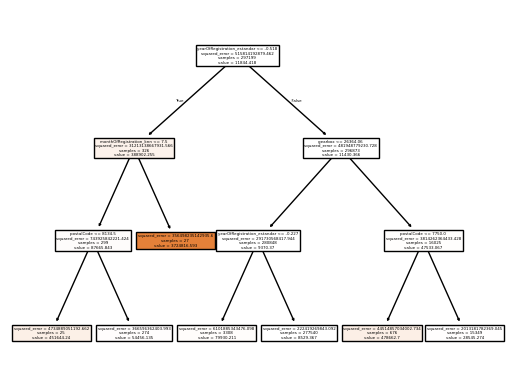

In [24]:
plot_tree(decision_tree=modelo_arbol, 
          feature_names=X.columns, 
          filled = True)

In [36]:

params_arbol = {
    'max_depth': [3],
    'min_samples_split': [10],
    'min_samples_leaf': [10],
    'max_leaf_nodes': [4]
}
grid_search_arbol = GridSearchCV(DecisionTreeRegressor(random_state=42), 
                                 param_grid= params_arbol, 
                                 cv = 5,
                                 scoring="neg_mean_squared_error", 
                                 n_jobs=-1)

grid_search_arbol.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3], 'max_leaf_nodes': [4],
                         'min_samples_leaf': [10], 'min_samples_split': [10]},
             scoring='neg_mean_squared_error')

In [37]:
modelo_final_arbol = grid_search_arbol.best_estimator_
modelo_final_arbol

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=4, min_samples_leaf=10,
                      min_samples_split=10, random_state=42)

In [27]:
y_pred_test = modelo_final_arbol.predict(X_test)
y_pred_train = modelo_final_arbol.predict(X_train)


In [29]:
metricas(y_pred_test= y_pred_test, y_test=y_test, y_train= y_train, y_pred_train=y_train)

,r2,MAE,MSE,RMSE
train,1.00,0.00,0.00,0.00
test,-0.22,"9,991.23","8,826,949,038.54","93,951.84"


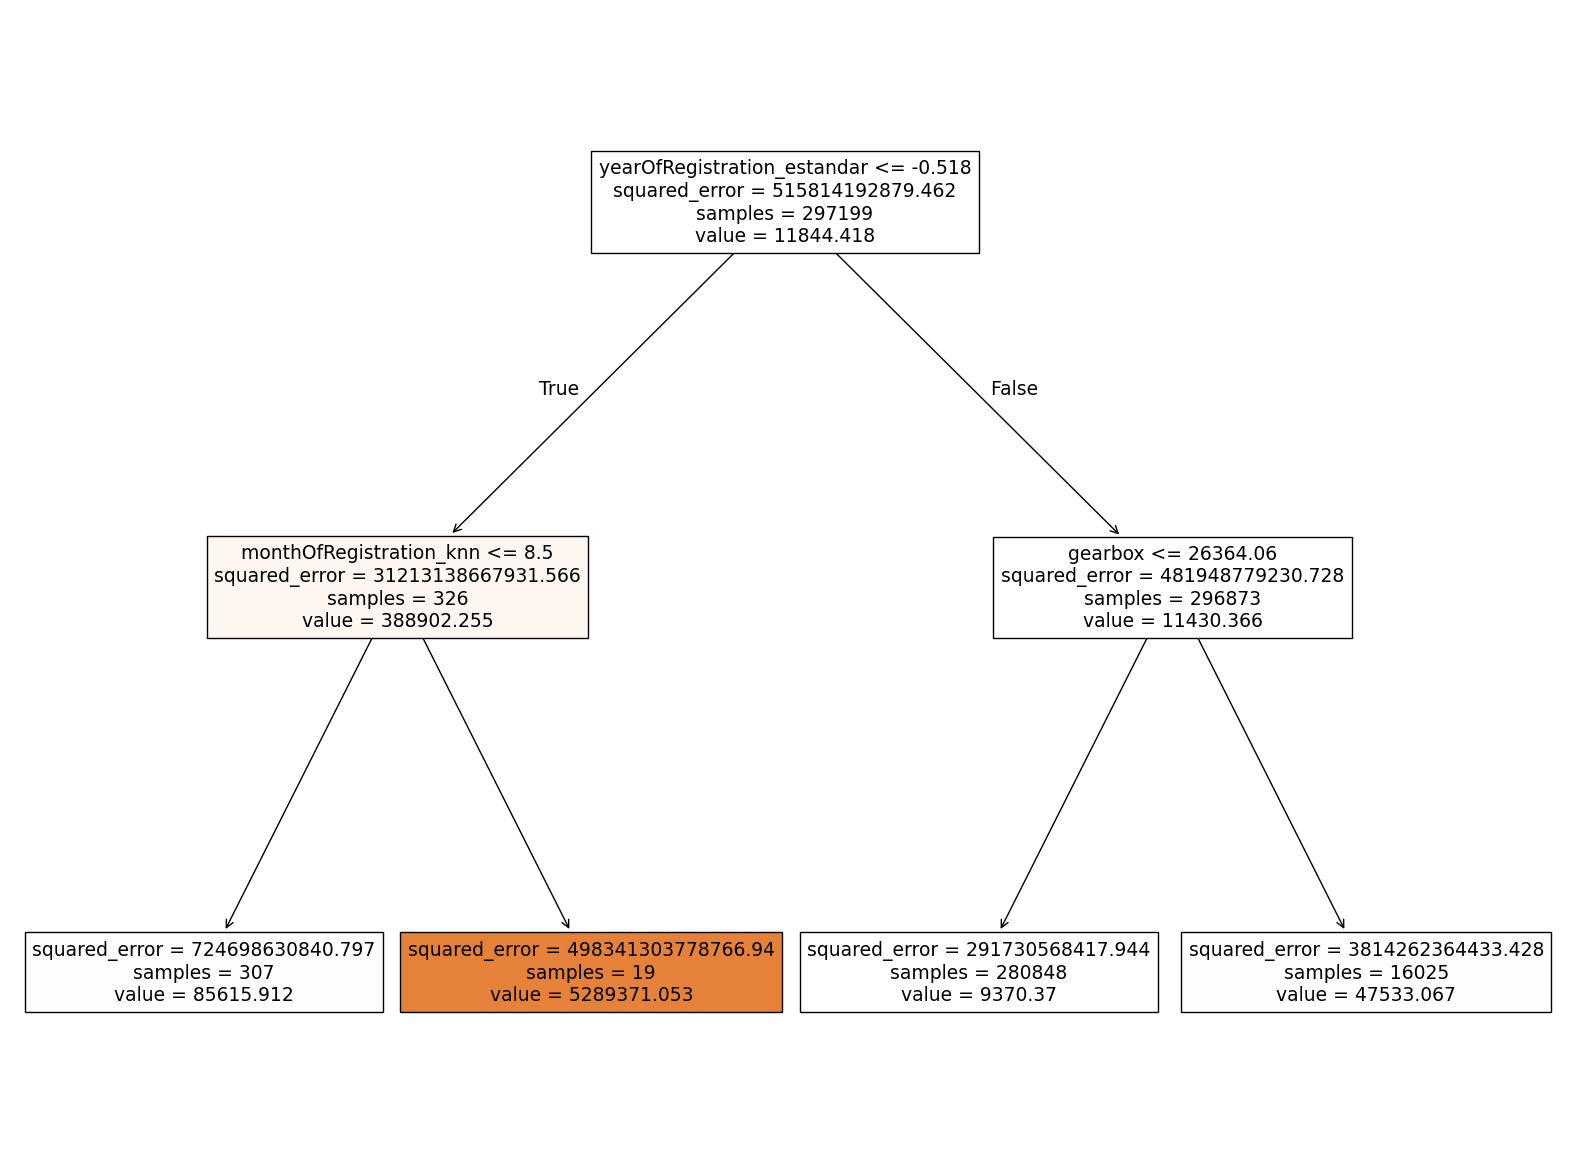

In [30]:
plt.figure(figsize = (20, 15))
plot_tree(decision_tree=modelo_final_arbol, 
          feature_names=X.columns, 
          filled = True);

In [35]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol.cv_results_)
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like = "param").drop(columns = "params")
df_resultados_arbol_filtrado["MSE"] = df_resultados_arbol["mean_test_score"] 
df_resultados_arbol_filtrado.head()

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
0,3,4,10,10,"-519,344,053,965.56"


TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

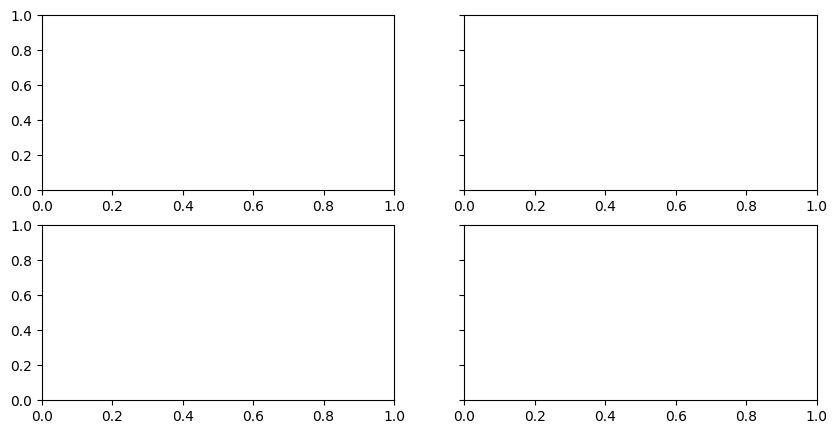

In [34]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 5), sharey = True)
axes = axes.flat

for indice, columns in enumerate(df_resultados_arbol_filtrado.columns[:-1]):

    df_rmse = np.sqrt(df_resultados_arbol_filtrado.groupby(columns)["MSE"].mean().abs())
    sns.lineplot(x = df_rmse.index, y = df_rmse.values, data = df_rmse, ax = axes[indice])
    axes[indice].grid()
    axes[indice].set_title(columns)
    axes[indice].set_xlabel("")
plt.tight_layout()

In [33]:
pd.DataFrame(modelo_final_arbol.feature_importances_, columns = ["Importancia"], index=X.columns).sort_values(by = "Importancia", ascending=False)

,Importancia
monthOfRegistration_knn,0.88
yearOfRegistration_estandar,0.08
gearbox,0.04
vehicleType,0.00
abtest,0.00
offerType,0.00
fuelType,0.00
model,0.00
brand,0.00
notRepairedDamage,0.00


#